In [1]:
%matplotlib inline

In [2]:
# Stratified K-Fold valuation is specifically designed to maintain
# the class proportions.

In [3]:
# Steps:
#  -> Create small dataset
#  -> Use stratified k-fold validation
#  -> Keep it small so we can see the variations
#  -> Plot the class proportins at each step to illustrate
#     how the class proportions are maintained.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
X, y = datasets.make_classification(n_samples=int(1e3),
                                    weights=[1./11])

In [6]:
# check overall class weight distribution:
y.mean()

0.90700000000000003

In [7]:
# create a stratified k-fold object for each fold. Measure the
# proportion of verse that are 1. Plot the proportion of classes
# by the split number to see how/if it changes.

In [8]:
from sklearn import cross_validation
n_folds = 50
strat_kfold = cross_validation.StratifiedKFold(y,
                                               n_folds=n_folds)

In [9]:
shuff_split = cross_validation.ShuffleSplit(n=len(y),
                                            n_iter=n_folds)

In [10]:
kfold_y_props = []
shuff_y_props = []
for (k_train, k_test), (s_train, s_test) in zip(strat_kfold,
                                                shuff_split):
    kfold_y_props.append(y[k_train].mean())
    shuff_y_props.append(y[s_train].mean())

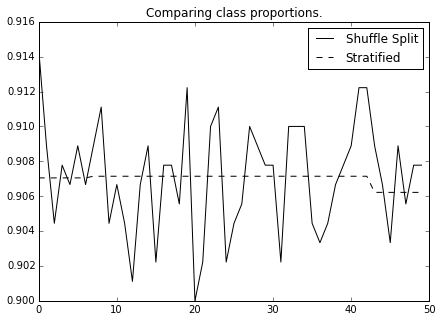

In [11]:
f, ax = plt.subplots(figsize=(7,5))
ax.plot(range(n_folds), shuff_y_props, label='Shuffle Split',
        color='k')
ax.plot(range(n_folds), kfold_y_props, label='Stratified',
        color='k', ls='--')
ax.set_title('Comparing class proportions.')
ax.legend(loc='best')

In [12]:
three_classes = np.random.choice([1,2,3], p=[.1, .4, .5],
                                 size=1000)
import itertools as it
for train, test in cross_validation.StratifiedKFold(three_classes,
                                                    5):
    print np.bincount(three_classes[train])

[  0  90 288 420]
[  0  90 289 421]
[  0  90 289 421]
[  0  91 289 421]
[  0  91 289 421]


In [ ]:
# we got roughly the sample sizes of each class for our training
# and testing proportions.